# Bagging

In this notebook, we import sklearn's BaggingClassifier from its ensemble module to classify Gentoo and Chinstrap penguins. We stat by importing the necessary libraries, loading the [penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv "Title"), and preprocessing the data:

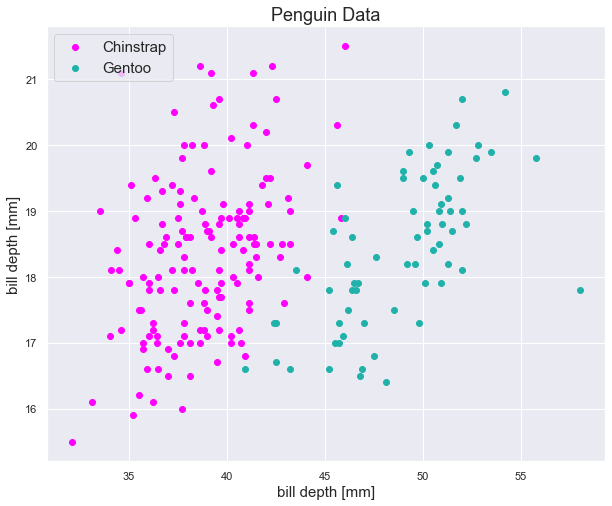

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load penguin data 
penguins = sns.load_dataset("penguins")

Adelie = penguins[penguins.species == "Adelie"]
Chinstrap = penguins[penguins.species == "Chinstrap"]
Gentoo = penguins[penguins.species == "Gentoo"]

# Create feature matrix
X = penguins.iloc[:222][["bill_length_mm", "bill_depth_mm"]].values
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(penguins.iloc[:222].species == "Adelie", 0, 1)
y = np.delete(y, 3)

plt.figure(figsize = (10, 8))
plt.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
plt.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
plt.xlabel("bill depth [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Penguin Data", fontsize = 18)
plt.show()

Now we fit 3 different classifiers to this data: a stump classifier with maximum depth 1, a tree classifier with maximum depth 6, and a bagging classifier with maximum depth 1 and with $n = 500$ estimators. In each case we print a classification report:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.89      0.96      0.92        25

    accuracy                           0.96        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.96      0.96      0.96        89
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.92      0.92      0.92        25

    accuracy                           0.96        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.96      0.96      0.96        89
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.92      0.96      0.94        25

    accuracy                           0.97        89
   macro avg       0.95      0.96      

We see in the above classification reports that all 3 models perform well on this data set. Bagging, as one might suspect, does the best!

To finish, we plot the decision regions that each classifier generated:

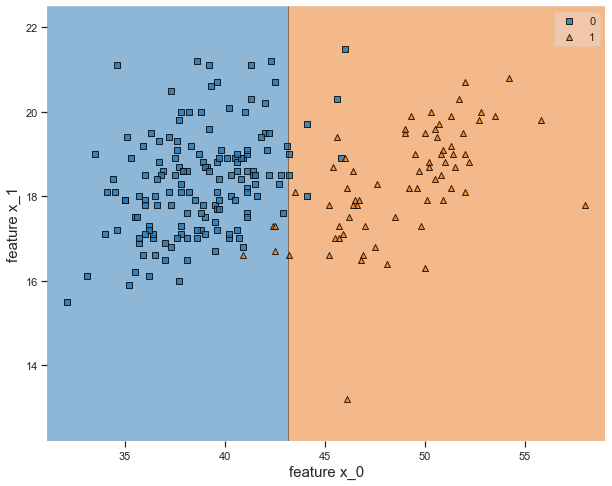

In [3]:
# Stump classifier

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = stump_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

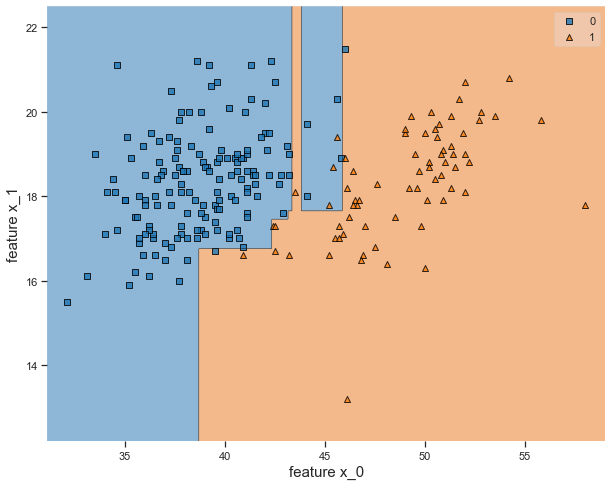

In [4]:
# Tree classifier

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

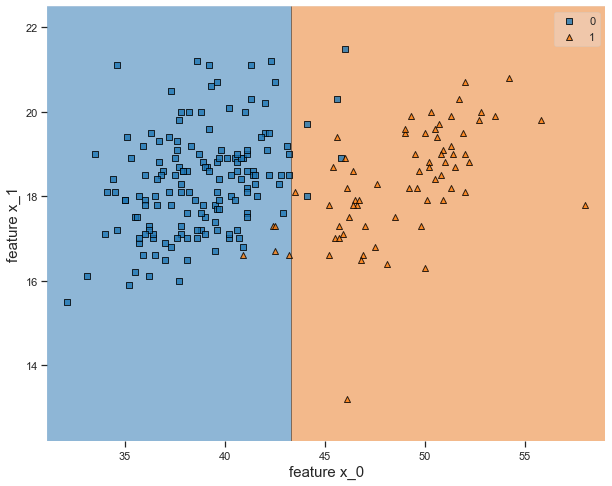

In [5]:
# Bagging classifier

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

We note that the stump and bagging classifiers generate a line for their decision boundaries since they use decision trees with a maximum depth of 1. The tree classifier, on the other hand, generates a decision boundary with many orthogonal line segments, reflecting the fact that it's a decision tree with a maximum depth of 6. This concludes our analysis of boosting!